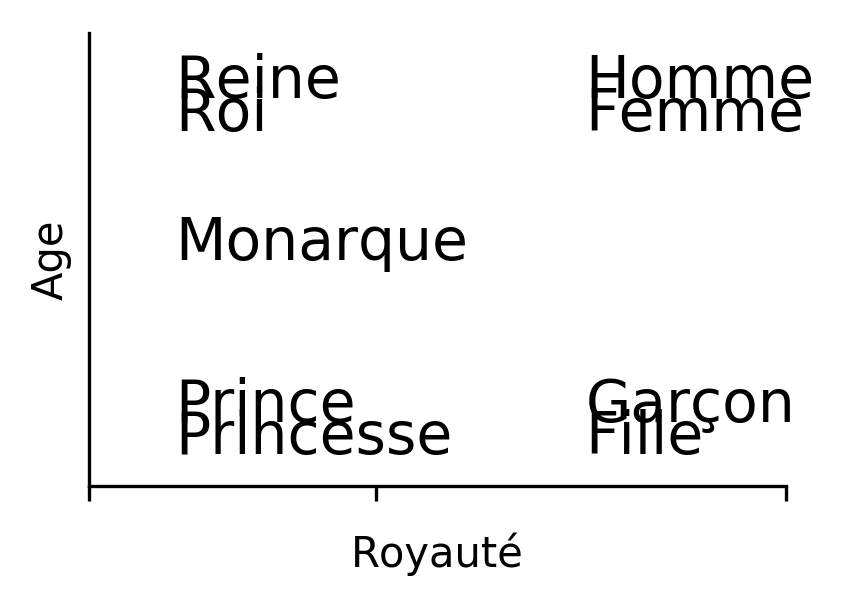

In [47]:
import pandas as pd
import matplotlib
import math

df = pd.read_csv("./fake_vectors.csv", delimiter="\t", index_col=0)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

ax = principalDf.plot.scatter(x=["PC1"], y=["PC2"], c="white", figsize=(3, 2))
already_marked = []
for i, txt in enumerate(df.index):
    curr = principalDf.loc[i, :].tolist()
    curr = list(map(lambda x: round(x, 1), curr))
    reduction = [0.045, 0]
    if curr in already_marked:
        reduction[1] += 0.1
        
    ax.annotate(txt, principalDf.loc[i, :]-reduction, fontsize=14)
    already_marked.append(curr)
    
ax.get_xaxis()#.set_visible(True)
ax.get_yaxis()#.set_visible(True)
ax.set_xticks([-0.7, 0, 1])
ax.set_yticks([-0.7, 0, 0.7])
ax.set_xlabel("Royauté")
ax.set_ylabel("Caractère royal")
ax.set_yticks([])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
fig = ax.get_figure()
fig.set_dpi(300)
fig.show()